# Analysis of Reading Writing and Math scores of children with different background

### table of contents
* [Goals]
* [Data]
* [Exploratory Data Analysis]
* [Linear Regression Model]
    

## Goals
this notebook contains different analysis of different children scores based on their background and this notebooks goal is to:
- get acquantied with the data
- analyse different factors impacting the scores
- clean the data for modeling
- make a model that predicts math score, writing score and reading score



In [168]:
#importing essential librarys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [157]:
#importing data
data = pd.read_csv('score.csv')
df = data.copy()

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [158]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].max())
    print(df[i].min())
    print('\n')

gender
['female' 'male']
male
female


race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
group E
group A


parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
some high school
associate's degree


lunch
['standard' 'free/reduced']
standard
free/reduced


test preparation course
['none' 'completed']
none
completed


math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
100
0


reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  8

as we can see there are 8 columns in the data those column includes gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score
- gender has 2 unique things female or male
- race and ethnicity are put into different groups 
- parental education levels include: bachelor's degree ,some college, master's degree, associate's degree, high school and some high school
- lunch and preparation course is binary
- math score ranges from 0-100
- reading score ranges from 17-100
- writing score ranges from 10 -100



,writing score,reading score,math score
count,1000.000000,1000.000000,1000.00000
mean,68.054000,69.169000,66.08900
std,15.195657,14.600192,15.16308
min,10.000000,17.000000,0.00000
25%,57.750000,59.000000,57.00000
50%,69.000000,70.000000,66.00000
75%,79.000000,79.000000,77.00000
max,100.000000,100.000000,100.00000


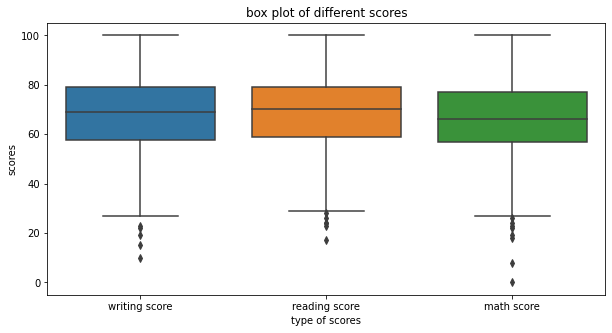

In [160]:
scores = df[['writing score', 'reading score', 'math score']]
test = scores.stack().reset_index()
plt.figure(figsize = (10,5))
test.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.boxplot(data = test, x = 'type of scores' , y = 'scores')
plt.title('box plot of different scores')
scores.describe()

The mean is pretty much identical throughout the different scores with math score having more variance and lower minimum

Text(0.5, 1.0, 'distribution of different scores')

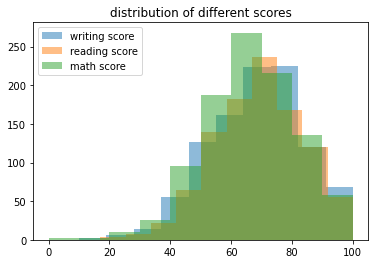

In [128]:
plt.hist(df['writing score'], alpha = 0.5)
plt.hist(df['reading score'], alpha = 0.5)
plt.hist(df['math score'], alpha = 0.5)
plt.legend(['writing score', 'reading score', 'math score'])
plt.title('distribution of different scores')

We can see that distribution between the scores is pretty much the same with a left skewed binomial distribution

<AxesSubplot:xlabel='parental level of education', ylabel='scores'>

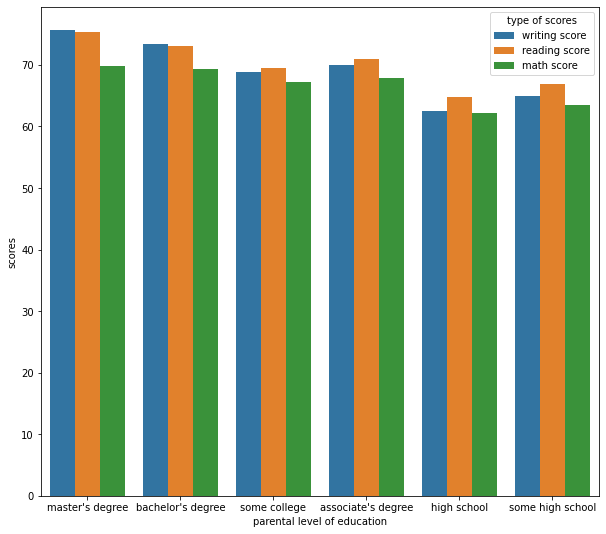

In [116]:
plt.figure(figsize = (10,9))
scores_index = ['writing score', 'reading score', 'math score']
order = ["master's degree", "bachelor's degree", 'some college', "associate's degree",'high school', 'some high school']
groupbytest = data.groupby(df['parental level of education'])[scores_index].mean()
groupbytest
groupbytest = groupbytest.stack().reset_index()
groupbytest.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.barplot(data = groupbytest, x= 'parental level of education', y = 'scores', hue = 'type of scores' ,order =order)


children that has parents with higher education levels seems to have higher scores

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

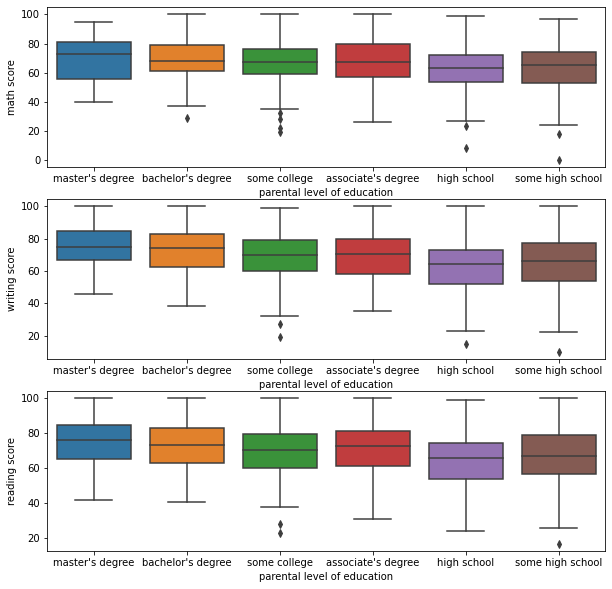

In [123]:
plt.figure(figsize = (10,10))
order = ["master's degree", "bachelor's degree", 'some college', "associate's degree",'high school', 'some high school']
plt.subplot(3,1,1)
sns.boxplot(y = 'math score', x= 'parental level of education', data= data , order =order)
plt.subplot(3,1,2)
sns.boxplot(y = 'writing score', x= 'parental level of education', data= data, order =order)
plt.subplot(3,1,3)
sns.boxplot(y = 'reading score', x= 'parental level of education', data= data, order =order)

we can see that high school and some high school degree have a lot of variance

<AxesSubplot:xlabel='race/ethnicity', ylabel='scores'>

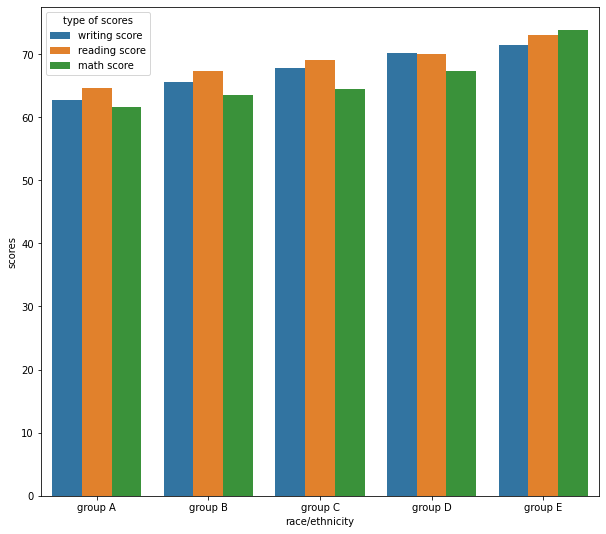

In [117]:
plt.figure(figsize = (10,9))
scores_index = ['writing score', 'reading score', 'math score']
order = [ 'group A' , 'group B', 'group C','group D', 'group E']
groupbytest = data.groupby(df['race/ethnicity'])[scores_index].mean()
groupbytest
groupbytest = groupbytest.stack().reset_index()
groupbytest.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.barplot(data = groupbytest, x= 'race/ethnicity', y = 'scores', hue = 'type of scores' ,order =order)


group e seems to have a higher score compared to the other groups and group a seem to have the lowest average score throughout the 3 categories

<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

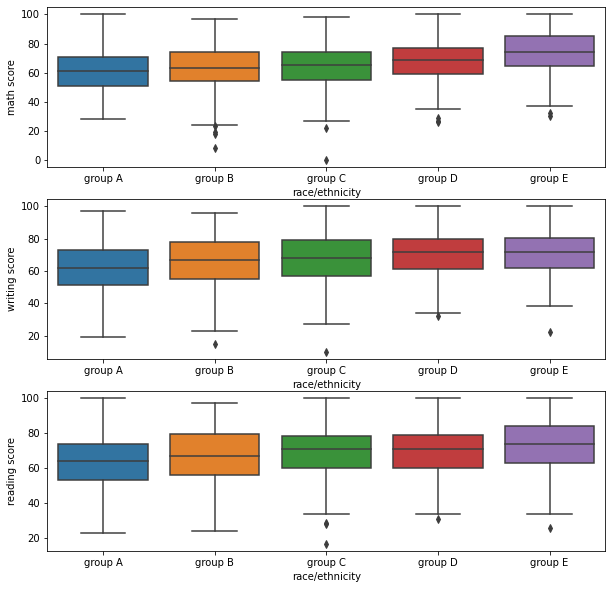

In [122]:
plt.figure(figsize = (10,10))
order = [ 'group A' , 'group B', 'group C','group D', 'group E']
plt.subplot(3,1,1)
sns.boxplot(y = 'math score', x= 'race/ethnicity', data= data, order = order)
plt.subplot(3,1,2)
sns.boxplot(y = 'writing score', x= 'race/ethnicity', data= data, order = order)
plt.subplot(3,1,3)
sns.boxplot(y = 'reading score', x= 'race/ethnicity', data= data, order= order)

gender
female    518
male      482
dtype: int64

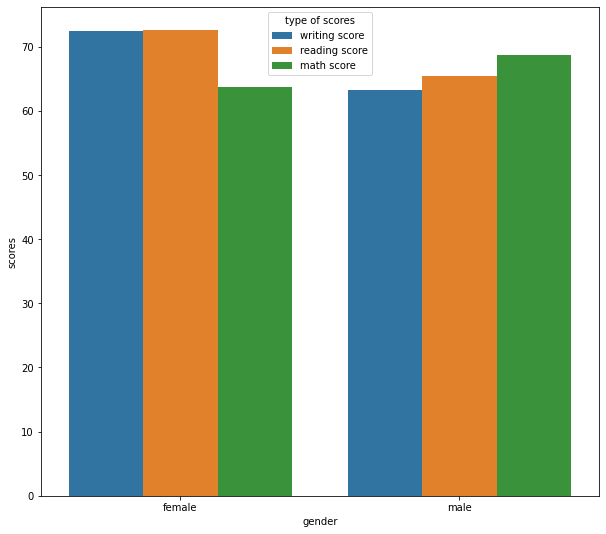

In [152]:
plt.figure(figsize = (10,9))
scores_index = ['writing score', 'reading score', 'math score']
groupbytest = data.groupby(df['gender'])[scores_index].mean()
groupbytest
groupbytest = groupbytest.stack().reset_index()
groupbytest.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.barplot(data = groupbytest, x= 'gender', y = 'scores', hue = 'type of scores')
countmale = data.value_counts(data.gender)
countmale

we see that female score higher than male in writing and reading while male score higher in math

Text(0.5, 1.0, 'average score of different categories of lunch')

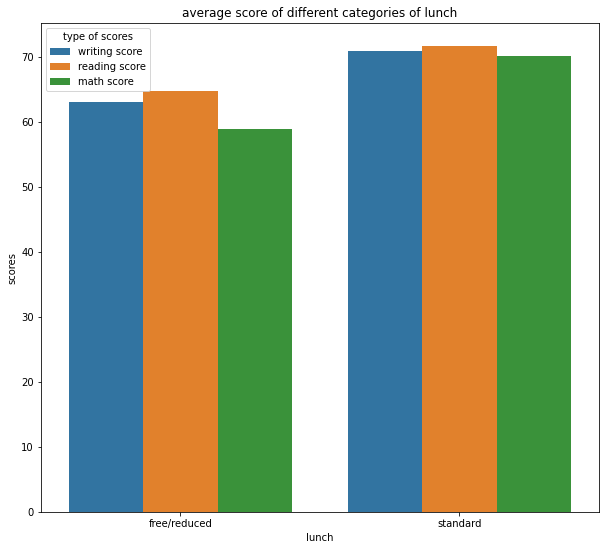

In [162]:
plt.figure(figsize = (10,9))
scores_index = ['writing score', 'reading score', 'math score']
groupbytest = data.groupby(df['lunch'])[scores_index].mean()
groupbytest
groupbytest = groupbytest.stack().reset_index()
groupbytest.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.barplot(data = groupbytest, x= 'lunch', y = 'scores', hue = 'type of scores')
plt.title('average score of different categories of lunch')


we can also evaluate that kids that are given free lunch has significantly lower average scores compared to the counterpart

Text(0.5, 1.0, 'average score of test preparation course category')

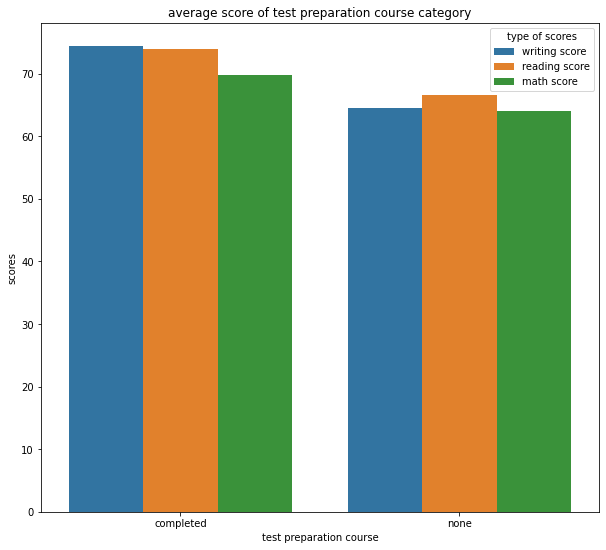

In [163]:
plt.figure(figsize = (10,9))
scores_index = ['writing score', 'reading score', 'math score']
groupbytest = data.groupby(df['test preparation course'])[scores_index].mean()
groupbytest
groupbytest = groupbytest.stack().reset_index()
groupbytest.rename(columns = {'level_1':'type of scores', 0 : 'scores'}, inplace = True)
sns.barplot(data = groupbytest, x= 'test preparation course', y = 'scores', hue = 'type of scores')
plt.title('average score of test preparation course category')


and kids that completed the preparation course seem to perform better than those who did not

lunch                    free/reduced  standard
test preparation course                        
completed                         131       227
none                              224       418


<AxesSubplot:xlabel='lunch', ylabel='0'>

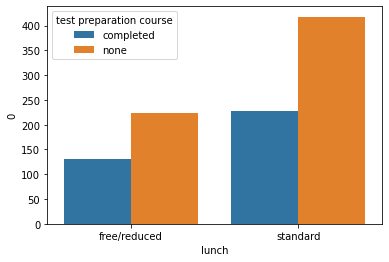

In [150]:
#is there correlation between test preparation and free lunch
lunchpreparationcorr = pd.crosstab(data['test preparation course'], data['lunch'])
print(lunchpreparationcorr)
lunchpreparationcorr = lunchpreparationcorr.stack().reset_index()
lunchpreparationcorr
sns.barplot(x = 'lunch', hue = 'test preparation course', data= lunchpreparationcorr, y = 0)

we can see that there is no relation between lunch category and completing the preparation course, 131/(131+227)=0.37  224/(224+418)= 0.35
we can see that both have identical distribution

# Making a regression model that predicts the math score

In [165]:
#cleaning the data and turning all the strings into integer values
df['gender'] = df.gender.map({'male':0, 'female':1})
df['lunch']= df.lunch.map({'standard':1,'free/reduced':0})
df['race/ethnicity'] = df['race/ethnicity'].map({'group B':1, 'group C':2, 'group A':0, 'group D':3, 'group E':4})
df['parental level of education'] = df['parental level of education'].map({"bachelor's degree":4, 'some college':3, "master's degree":5, "associate's degree":2, 'high school':1, 'some high school':0})
df['test preparation course'] = (df['test preparation course'].values == 'completed').astype(int)

<AxesSubplot:>

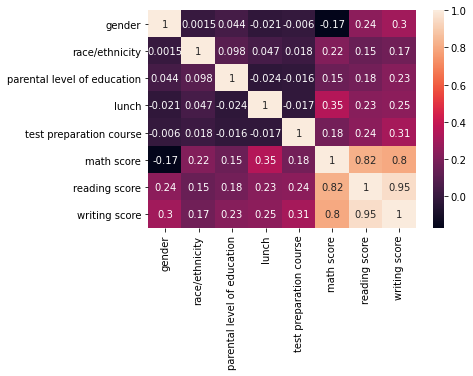

In [191]:
#looking at correlation
matrix = df.corr()
sns.heatmap(matrix, annot= True)

R^2 Train score:
0.8675506263826387
R^2 Test score:
0.8678154571868286


Text(0.5, 1.0, 'Math Score vs Predicted Math Score')

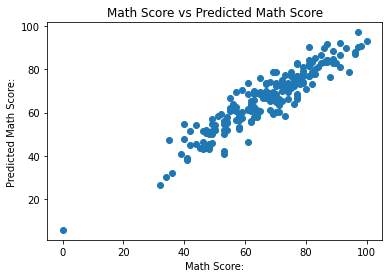

In [181]:
#predicting math score based on the other scores

#LinearRegression
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'reading score','writing score']]
y = df['math score']
#splitting data 80-20 training-test
x_train, x_test, y_train, y_test  = train_test_split(x,y,random_state = 5, train_size = 0.8)
#making model

lm = LinearRegression()
model = lm.fit(x_train, y_train)

#finding the y varibale at x test
y_predict= lm.predict(x_test)
#finding the r^2 of the model 
print("R^2 Train score:")
print(lm.score(x_train, y_train))
#finding the r^2 of the test
print("R^2 Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test,y_predict)
plt.xlabel("Math Score:")
plt.ylabel("Predicted Math Score:")
plt.title("Math Score vs Predicted Math Score")


R^2 Train score:
0.9406672646241896
R^2 Test score:
0.9537777678164295


Text(0.5, 1.0, 'Writing Score vs Predicted Writing Score')

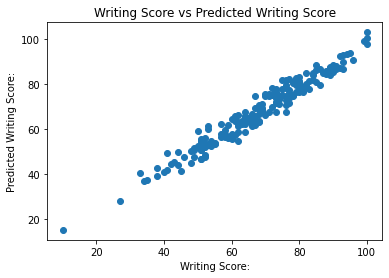

In [185]:
#predicting math score based on the other scores

#LinearRegression
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'reading score','math score']]
y = df['writing score']
#splitting data 80-20 training-test
x_train, x_test, y_train, y_test  = train_test_split(x,y,random_state = 5, train_size = 0.8)
#making model

lm = LinearRegression()
model = lm.fit(x_train, y_train)

#finding the y varibale at x test  
y_predict= lm.predict(x_test)
#finding the r^2 of the model 
print("R^2 Train score:")
print(lm.score(x_train, y_train))
#finding the r^2 of the test
print("R^2 Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test,y_predict)
plt.xlabel("Writing Score:")
plt.ylabel("Predicted Writing Score:")
plt.title("Writing Score vs Predicted Writing Score")


R^2 Train score:
0.9231473884780791
R^2 Test score:
0.9311362715821236


Text(0.5, 1.0, 'Reading Score vs Predicted Reading Score')

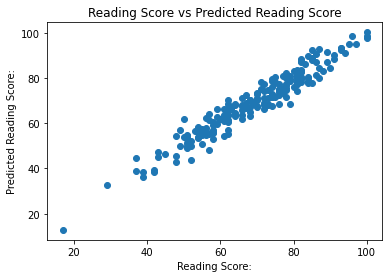

In [184]:
#predicting math score based on the other scores

#LinearRegression
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'writing score','math score']]
y = df['reading score']
#splitting data 80-20 training-test
x_train, x_test, y_train, y_test  = train_test_split(x,y,random_state = 5, train_size = 0.8)
#making model

lm = LinearRegression()
model = lm.fit(x_train, y_train)

#finding the y varibale at x test
y_predict= lm.predict(x_test)
#finding the r^2 of the model 
print("R^2 Train score:")
print(lm.score(x_train, y_train))
#finding the r^2 of the test
print("R^2 Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test,y_predict)
plt.xlabel("Reading Score:")
plt.ylabel("Predicted Reading Score:")
plt.title("Reading Score vs Predicted Reading Score")


## model conclusion
- all the model seems to have a high r^2 value with around 90% each
- math model seems to have the lowest r^2 and maybe its because math scores seem to have the highest variance compared to the other scored